## KNN Approach



### Setup

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets

from pathlib import Path
import os

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler


from pyMLaux import plot_history, evaluate_classification_result,plot_2d_prediction


2024-05-06 22:29:06.373290: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-06 22:29:06.488471: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-06 22:29:06.488532: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-06 22:29:06.490515: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-06 22:29:06.503819: I tensorflow/core/platform/cpu_feature_guar

In [2]:
# read dynamic path
base_dir = Path(os.getcwd())/"implementation"
data_dir = base_dir / "data/source/"
result_dir = base_dir / "data/results/"

### load & prepare dataset

the following code needs to be adapted for each protein-ligand complex individually

In [3]:
nn_data_raw_train = pd.read_csv(data_dir / "MOAB/moab_smote_train.csv")
nn_data_raw_test = pd.read_csv(data_dir / "MOAB/moab_smote_test.csv")

In [4]:
nn_data_train = {'data': np.array(nn_data_raw_train.iloc[:, 2:-1]),
             'target': np.array(nn_data_raw_train.iloc[0:,-1]),
             'feature_names': nn_data_raw_train.columns[2:-1],
             'target_names': ['inactive', 'active']}

nn_data_test = {'data': np.array(nn_data_raw_test.iloc[:, 2:-1]),
             'target': np.array(nn_data_raw_test.iloc[0:,-1]),
             'feature_names': nn_data_raw_test.columns[2:-1],
             'target_names': ['inactive', 'active']}



### train and apply neural network

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(nn_data_train['data'].shape[1], )),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

2024-05-06 22:29:12.376373: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-06 22:29:12.443291: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-06 22:29:12.443473: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-06 22:29:12.455740: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-06 22:29:12.456026: I external/local_xla/xla/stream_executor

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 60        
                                                                 
Total params: 60 (240.00 Byte)
Trainable params: 60 (240.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-06 22:29:12.923765: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 559 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/150


2024-05-06 22:29:15.084531: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-05-06 22:29:15.465351: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fe7b8914070 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-06 22:29:15.465387: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-05-06 22:29:15.469730: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-06 22:29:15.488268: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1715027355.567707   13876 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


13/13 - 1s - loss: 0.7730 - accuracy: 0.4300 - val_loss: 0.7381 - val_accuracy: 0.4808 - 1s/epoch - 110ms/step
Epoch 2/150
13/13 - 0s - loss: 0.7519 - accuracy: 0.4589 - val_loss: 0.7138 - val_accuracy: 0.5385 - 90ms/epoch - 7ms/step
Epoch 3/150
13/13 - 0s - loss: 0.7374 - accuracy: 0.4541 - val_loss: 0.6969 - val_accuracy: 0.5577 - 87ms/epoch - 7ms/step
Epoch 4/150
13/13 - 0s - loss: 0.7279 - accuracy: 0.4879 - val_loss: 0.6822 - val_accuracy: 0.5385 - 90ms/epoch - 7ms/step
Epoch 5/150
13/13 - 0s - loss: 0.7197 - accuracy: 0.5072 - val_loss: 0.6728 - val_accuracy: 0.5385 - 83ms/epoch - 6ms/step
Epoch 6/150
13/13 - 0s - loss: 0.7123 - accuracy: 0.5169 - val_loss: 0.6671 - val_accuracy: 0.5385 - 100ms/epoch - 8ms/step
Epoch 7/150
13/13 - 0s - loss: 0.7063 - accuracy: 0.5266 - val_loss: 0.6629 - val_accuracy: 0.5577 - 92ms/epoch - 7ms/step
Epoch 8/150
13/13 - 0s - loss: 0.7002 - accuracy: 0.5314 - val_loss: 0.6584 - val_accuracy: 0.5577 - 97ms/epoch - 7ms/step
Epoch 9/150
13/13 - 0s - lo

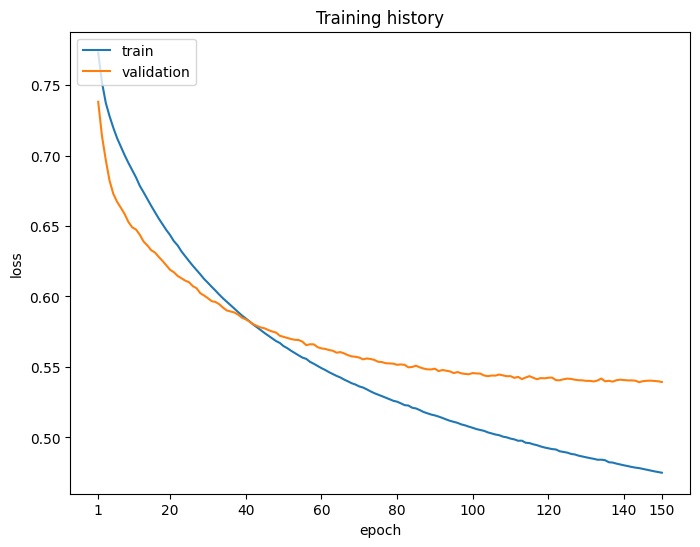

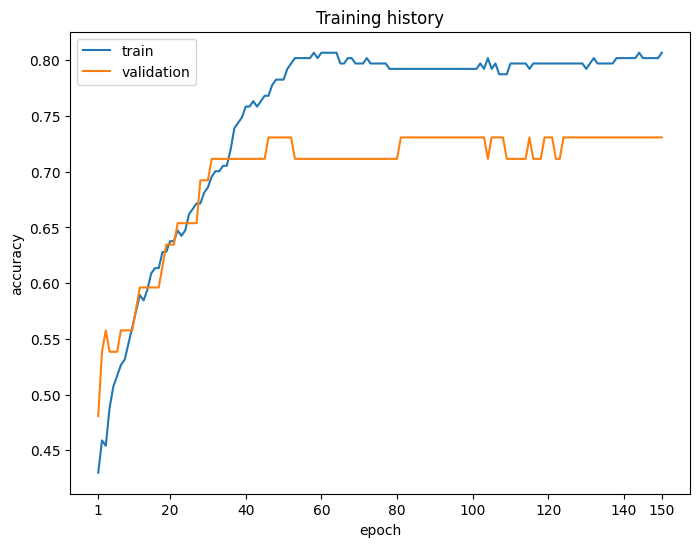

In [6]:
history = model.fit(x=nn_data_train["data"], y=nn_data_train["target"], epochs=150, batch_size=16, validation_split=0.2, verbose=2)
plot_history(history)

### Evaluate Testdata using model

In [7]:
pred = model.predict(nn_data_test["data"])
classes= [1 if i > 0.5  else 0 for i in pred]


4/4 [==============================] - 0s 2ms/step


### Prepare Data for evaluation

In [8]:
result_df = pd.DataFrame(columns=nn_data_raw_train.columns[:-1])

for i, row in enumerate(nn_data_test["data"]):
    data = [i,i]
    data.extend(row)
    result_df.loc[i+1] = data

result_df["LABEL"] = nn_data_test["target"]
result_df["PRED"] = classes

result_df.to_csv(result_dir / "MOAB/fe_smote_nn.csv", encoding="utf-8")